In [3]:
%matplotlib inline
#from pylab import imshow
#import matplotlib.pyplot as plt
from IPython.display import display
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-10-23 18:38:46,203: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
# Para multi_qbits, usaremos qasm simulator (más inmediato ver estados en histogramas)
def proceed(quantum_circuit):
    
    # Simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')
    
    # Execution
    result = execute(quantum_circuit,statevector_simulator).result()
    
    # Assignation
    statevector_results=result.get_statevector(quantum_circuit)
    #count=result.get_counts(quantum_circuit)
    #print(count)
    
    # Draw QSphere
    q_sphere=plot_state_qsphere(statevector_results)
    
    # Return
    return statevector_results#, count, q_sphere

In [5]:
# Para multi_qbits, usaremos qasm simulator (más inmediato ver estados en histogramas)
def proceed_m(quantum_circuit):
    
    # Simulator
    simulator = Aer.get_backend('qasm_simulator')
    
    # Execution
    result = execute(quantum_circuit,simulator,shots=1).result()
    
    # Assignation
    results=result.get_counts(quantum_circuit)
    
    
    # Return
    print(results)
    print(results.keys())
    return results 

In [6]:
def int_control(init=1,end=10):

    while True:

        try:

            var=int(input("\nPlease introduce an int number: "))

            if var<init:

                print(f"The number needs to be higher or equal than {init}.\n")

            elif var>end:

                print(f"The number needs to be lower or equal to {end}.\n")

            else:

                return var

        except ValueError:

            print("The given value is not valid.\n")

In [7]:
def str_control():

    while True:

        try:

            var=input("\nPlease introduce a name: ")

            return var

        except ValueError:

            print("The given value is not valid.\n")

In [8]:
# Menú del jugador
def player_choice(qcEn,n,MP,MPMax):
    # Circuit generation
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(q, c)
    
    if n==2:
        gates = {'X': [1,1], 'H': [2,1], 'Z': [3,1], 'END': [0,0]}
    elif n==3:
        gates = {'X': [1,1], 'H': [2,1], 'Z': [3,1], 'S': [4,1], 'T': [5,1], 'CNOT': [6,2], 'END': [0,0]}
    elif n==5:
        gates = {'X': [1,1], 'H': [2,1], 'Z': [3,1], 'S': [4,1], 'T': [5,1], 'CNOT': [6,2], 'SWAP': [7,2], 'CCNOT': [10,3],'END': [0,0]}
    
    while True:
        
        print(f"MP: {MP}/{MPMax}")
        
        display((qc+qcEn).draw())
        
        print(f"Técnicas disponibles:\n{gates.keys()}")

        if MP==0:
            if input("Ya has gastado todos tus MP. ¿Proceder? Y/N:")=='Y':
                break
            else:
                qc = QuantumCircuit(q, c)
                MP=MPMax
                continue
        select=str_control().upper()

        # qubit decision
        if MP-gates[select][1]<0:
            print("You do not have enough MP for this action.\nPlease select another gate or end your turn.")
            continue
        else:
            MP=MP-gates[select][1]

        if gates[select][0]==6:
            while True:
                control=int_control(init=0,end=n-1)
                target=int_control(init=0,end=n-1)
                if control==target:
                    print("No control and target cannot be the same qubit.")
                else:
                    break
            qc.cx(control,target)

        elif gates[select][0]==7:
            while True:
                qubit1=int_control(init=0,end=n-1)
                qubit2=int_control(init=0,end=n-1)
                if control==target:
                    print("Both qubits cannot be the same.")
                else:
                    break
            qc.swap(qubit1,qubit2)

        elif gates[select][0]==10:
            while True:
                control1=int_control(init=0,end=n-1)
                control2=int_control(init=0,end=n-1)
                target=int_control(init=0,end=n-1)
                if control1==target or control2==target or control1==5:
                    print("No control and target cannot be the same qubit.")
                else:
                    break
            qc.ccx(control1,control2,target)

        elif gates[select][0]==0:
            break

        else:
            while True:
                qubit=int_control(init=0,end=n-1)
                break
            if gates[select][0]==1:
                qc.x(qubit)
            elif gates[select][0]==2:
                qc.h(qubit)
            elif gates[select][0]==3:
                qc.z(qubit)
            elif gates[select][0]==4:
                qc.s(qubit)
            elif gates[select][0]==5:
                qc.t(qubit)
    
    return qc

In [9]:
import numpy as np
import math

def WIN(n):
    winCond=np.zeros(int(math.pow(2,n)),dtype=complex)
    winCond[-1]=1.0
    return winCond

In [10]:
def level1_1():

    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.barrier(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.x(qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    
    return circuit

def level1_2():
    
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.barrier(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    
    return circuit

def level1_3():

    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.barrier(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.x(qreg_q[1])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.z(qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    
    return circuit

def level1_4():

    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.barrier(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    
    return circuit

def level1_5():

    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.barrier(qreg_q[1])
    circuit.barrier(qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    
    return circuit

def level1_6():

    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.barrier(qreg_q[1])
    circuit.barrier(qreg_q[0])
    circuit.swap(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    
    return circuit


def level1(i):
    
    if i==1:
        circuit=level1_1()
        
    elif i==2:
        circuit=level1_2()
        
    elif i==3:
        circuit=level1_3()
        
    elif i==4:
        circuit=level1_4()
        
    elif i==5:
        circuit=level1_5()
        
    elif i==6:
        circuit=level1_6()
        
    return circuit

In [11]:
# El código de verdad :D

from IPython.display import clear_output

def battle():

    # identifiador: 2 qubits -> level 1, 3 qubits -> level 2...
    nlevels={2:1,3:2,5:3}

    # nombre del jugador
    playerName=str_control()

    # establishment of initial HP and MP
    HP=int(input("\nInitial HP?: "))
    HPMax=HP;
    MP=int(input("\nInitial MP?: "))
    MPMax=MP;

    # score
    score=0
    
    # battles_won
    battles=0

    for stage in range(6): # número de stages
        
        score_stage=0

        #if stage==2:
        #    n=3;
        #else:
        #    n=2;
        
        n=2;
        
        # stages
        #if stage==0:
        #    qcEn.x(0)
        #    qcEn.measure(q,c)

        #if stage==1:
        #    qcEn.x(1)
        #    qcEn.measure(q,c)
        
        qcEn=level1(stage+1)
        display(qcEn.draw())

        # Condición de victoria
        winCond=WIN(n)

        while True:

            # Para ir limpiando la pantalla
            clear_output(wait=True)
            
            #display(qcEn.draw())

            print(f"Condición de victoria: {winCond}\n")

            print(f"Jugador: {playerName}\n")
            print(f"HP: {HP}/{HPMax}")

            qcPl=player_choice(qcEn,n,MP,MPMax)
            qcT=qcPl+qcEn

            display(qcT.draw())

            #result, count, qsphere=proceed(qcT)
            result=proceed(qcT)

            # depuración
            print(f"Tu resultado: {result}\n")


            # VICTORY COND
            if (abs(result)==winCond).all():
                print('You won!')
                score_stage=score_stage+100
                break
            else:
                score_stage=score_stage-20
                HP=HP-nlevels[n]
                MP=MPMax
                print(f'Enemies attack!You lost {nlevels[n]} HP...\nKeep fighting? Y/N')
                if str_control()=='Y':
                    continue
                else:
                    break
                    
        score=score+score_stage
        if score<0:
            score=0
            
        if HP==0:
            print('You were slain...')
            break
        battles=battles+1
        print('Proceed further? Y/N')
        if str_control()=='N':
            break
        else:
            if MP+nlevels[n]>MPMax:
                MP=MPMax
            else:
                MP=MP+nlevels[n]

    # Fin del juego
    print("La exploración al abismo cuántico ha finalizado. \nResultados:")
    print(f"Jugador: {playerName}\nPuntuación: {score}")
    
    scoreboard=open(f"scoreboard.txt","a")

    scoreboard.write(playerName+','+str(score)+','+str(battles)+'\n')
    #np.genfromtxt('col.txt',dtype='str')
    scoreboard.close()

    #np.genfromtxt(scoreboard,delimiter=",",dtype='str') 

In [22]:
# File opening
from io import open 
scoreboard=open(f"scoreboard.txt","a")
scoreboard.write('123\n')
#np.genfromtxt('col.txt',dtype='str')
scoreboard.close()

In [2]:
# MAIN GAME (PLEASE EXECUTE THIS CELL)
def QUANTA_ABYSS():
    modes={'story': 1, 'arcade': 2, 'shop': 3, 'scoreboard': 4, 'quit': 5}

    print("\033[1;32m Welcome to QuantaAbyss.")
    print("Select a gamemode writing it below:\n \i 'story', 'arcade', 'shop', 'scoreboard'\n \b0 Write \i 'quit' \b0 to leave")
    choice=str_control()
    if modes[choice]==1:
        story()
    elif modes[choice]==2:
        arcade()
    elif modes[choice]==3:
        shop()
    elif modes[choice]==4:
        scoreboard()
        
 

QUANTA_ABYSS()

 Welcome to QuantaAbyss.
Select a gamemode writing it below:
 \i 'story', 'arcade', 'shop', 'scoreboard'
0 Write \i 'quit'0 to leave
Traceback (most recent call last):
  File "/tmp/ipykernel_637/1219223403.py", line 19, in <module>
    QUANTA_ABYSS()
  File "/tmp/ipykernel_637/1219223403.py", line 7, in QUANTA_ABYSS
    choice=str_control()
NameError: name 'str_control' is not defined

Use %tb to get the full traceback.


In [1]:
print("\033[1;32m This text is Bright Green  \n") 

 This text is Bright Green  



Condición de victoria: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]

Jugador: Daniel

HP: 5/5
MP: 5/5


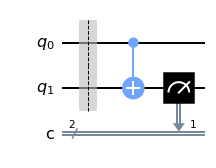

Técnicas disponibles:
dict_keys(['X', 'H', 'Z', 'END'])



Please introduce a name:  X

Please introduce an int number:  0


MP: 4/5


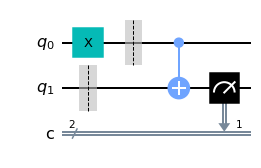

Técnicas disponibles:
dict_keys(['X', 'H', 'Z', 'END'])



Please introduce a name:  Y


Traceback (most recent call last):
  File "/tmp/ipykernel_767/3653708136.py", line 1, in <module>
    battle()
  File "/tmp/ipykernel_767/642121853.py", line 63, in battle
    qcPl=player_choice(qcEn,n,MP,MPMax)
  File "/tmp/ipykernel_767/3038355724.py", line 33, in player_choice
    if MP-gates[select][1]<0:
KeyError: 'Y'

Use %tb to get the full traceback.


In [12]:
battle()